In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [2]:
n = 5
coupon_I_have = []
coupon_for_collect = np.arange(n)
for ii in range(int(1e3)):
    buy = np.random.choice(coupon_for_collect,size=1,replace=True,)[0]
    coupon_I_have.append(buy)
    if len(np.unique(coupon_I_have)) == n:
        break
print(coupon_I_have)

[3, 1, 0, 2, 4]


In [3]:
def simulate_for_n(n):
    coupon_I_have = []
    coupon_for_collect = np.arange(n)
    for ii in range(int(1e7)):
        buy = np.random.choice(coupon_for_collect,size=1,replace=True,)[0]
        coupon_I_have.append(buy)
        if len(np.unique(coupon_I_have)) == n:
            break
    return coupon_I_have

In [4]:
n = 5
for ii in range(10):
    coupons = simulate_for_n(n)
    print('simulate %d, got %d coupons'%(ii,len(coupons)))

simulate 0, got 5 coupons
simulate 1, got 18 coupons
simulate 2, got 7 coupons
simulate 3, got 10 coupons
simulate 4, got 18 coupons
simulate 5, got 14 coupons
simulate 6, got 19 coupons
simulate 7, got 6 coupons
simulate 8, got 17 coupons
simulate 9, got 7 coupons


# let's simulate n from 1 to 20

In [5]:
results = []
for n in np.arange(1,21,):
    for simulate in tqdm(range(int(1e5)),desc='%d'%n):
        coupons = simulate_for_n(n)
        results.append([n,simulate,len(coupons)])

20: 100%|█████████████████████████████| 100000/100000 [05:31<00:00, 301.39it/s]


In [6]:
results_ = pd.DataFrame(results,columns=['N','simulate','Coupons'])

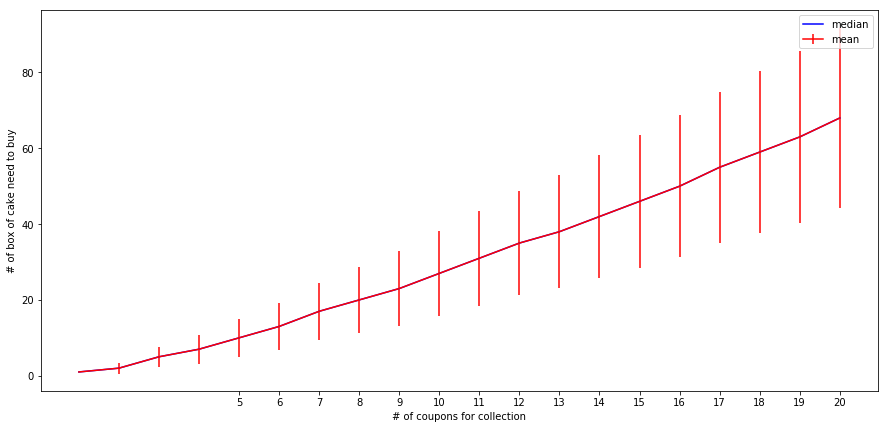

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
median_ = results_.groupby('N').median()['Coupons'].values
mean_ = results_.groupby('N').median()['Coupons'].values
std = results_.groupby('N').std()['Coupons'].values
ax.errorbar(x=np.arange(1,21),y=mean_,yerr=std,
            label='mean',color='red')
ax.plot(np.arange(1,21),median_,
       label='median',color='blue')
ax.set(xlabel='# of coupons for collection',
       ylabel='# of box of cake need to buy',
       xticks=np.arange(5,21))
ax.legend()

In [13]:
for n in np.arange(1,21):
    temp_df = results_[results_['N'] == n]
    prob_ = np.sum(temp_df['Coupons'] == n)/int(1e5)
    print("chance to get all %d coupons with %d purchase is: %.6f"%(n,n,prob_))

chance to get all 1 coupons with 1 purchase is: 1.000000
chance to get all 2 coupons with 2 purchase is: 0.500190
chance to get all 3 coupons with 3 purchase is: 0.220690
chance to get all 4 coupons with 4 purchase is: 0.094180
chance to get all 5 coupons with 5 purchase is: 0.037790
chance to get all 6 coupons with 6 purchase is: 0.015550
chance to get all 7 coupons with 7 purchase is: 0.006100
chance to get all 8 coupons with 8 purchase is: 0.002230
chance to get all 9 coupons with 9 purchase is: 0.000920
chance to get all 10 coupons with 10 purchase is: 0.000290
chance to get all 11 coupons with 11 purchase is: 0.000120
chance to get all 12 coupons with 12 purchase is: 0.000070
chance to get all 13 coupons with 13 purchase is: 0.000000
chance to get all 14 coupons with 14 purchase is: 0.000000
chance to get all 15 coupons with 15 purchase is: 0.000000
chance to get all 16 coupons with 16 purchase is: 0.000000
chance to get all 17 coupons with 17 purchase is: 0.000000
chance to get a

reference:
https://www.youtube.com/watch?v=3mu47FWEuqA
<br />Say $y_i$ is the time/position i^{th} new coupon occurs when I buy a new box of cake
<br />what we want to know is the expected value of $y_i$, where i is k (here we use k = 6)
<br />$X_i$ is the difference between $y_{i+1}$ and $y_i$, in other words, we compute the distance between each time we get a new coupon. Keep in mind that $y_0$ occurs always at the 0 time/position, and $X_0$ is always ONE because $y_1$ occurs always at the first time/position.
<br />Thus, $$y_6=\sum^5_{i=0}X_i$$because quick math
and, $$X_i = Geometric(\frac{6 - i}{6})$$
thus, the expected value of $X_i$ is the inverse of the Geometric distribution
$$\mathbb{E}[X_i] = \frac{6}{6-i}=6\frac{1}{6-i}$$

$$\mathbb{E}[y_6]=\mathbb{E}[\sum^5_{i=0}X_i]$$
$$=\sum^5_{i=0}\mathbb{E}[X_i]$$
$$=\sum^5_{i=0}\mathbb{E}[6\frac{1}{6-i}]$$
$$=6\sum^5_{i=0}\frac{1}{6-i}$$
$$=6\sum^6_{i=1}\frac{1}{i}$$
$$=14.7$$
In fact, the expected value of $y_k$, where $k>1$ is:
$$K\sum^{k}_{i=1}\approx K ln(K)$$

To [approximate](http://mat.uab.cat/matmat/PDFv2014/v2014n02.pdf):

$$\sum^K_{i=1}\frac{1}{i}=log(N) + \gamma +frac{1}{2N} + O(\frac{1}{N^2})$$
where $\gamma \approx 0.5772156649$ is the Euler-Mascheroni constant. 